In [423]:
import os              
import pandas as pd   
import matplotlib.pyplot as plt
import numpy as np
import random as rd
from sklearn.model_selection import train_test_split
from zlib import crc32
from sklearn.model_selection import StratifiedShuffleSplit


In [424]:
print("Current Working Directory:", os.getcwd())

HOUSING_PATH =  "../datasets/" 
HOUSING_NAME = "Housing.csv"        
HOUSING_FULL = os.path.join (HOUSING_PATH, HOUSING_NAME)

housing = pd.read_csv (HOUSING_FULL, thousands = ',')                                           #housing = load_housing_data()


Current Working Directory: c:\Users\topol\Hands-On-Machine-Learning-Projects\ML-Project-1


In [425]:
# Fetch the data 

housing.head(100)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
95,-122.26,37.80,36.0,5329.0,2477.0,3469.0,2323.0,2.0096,130000.0,NEAR BAY
96,-122.26,37.82,31.0,4596.0,1331.0,2048.0,1180.0,2.8345,183800.0,NEAR BAY
97,-122.26,37.81,29.0,335.0,107.0,202.0,91.0,2.0062,125000.0,NEAR BAY
98,-122.26,37.82,22.0,3682.0,1270.0,2024.0,1250.0,1.2185,170000.0,NEAR BAY


In [426]:
housing.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [427]:
housing.describe ()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


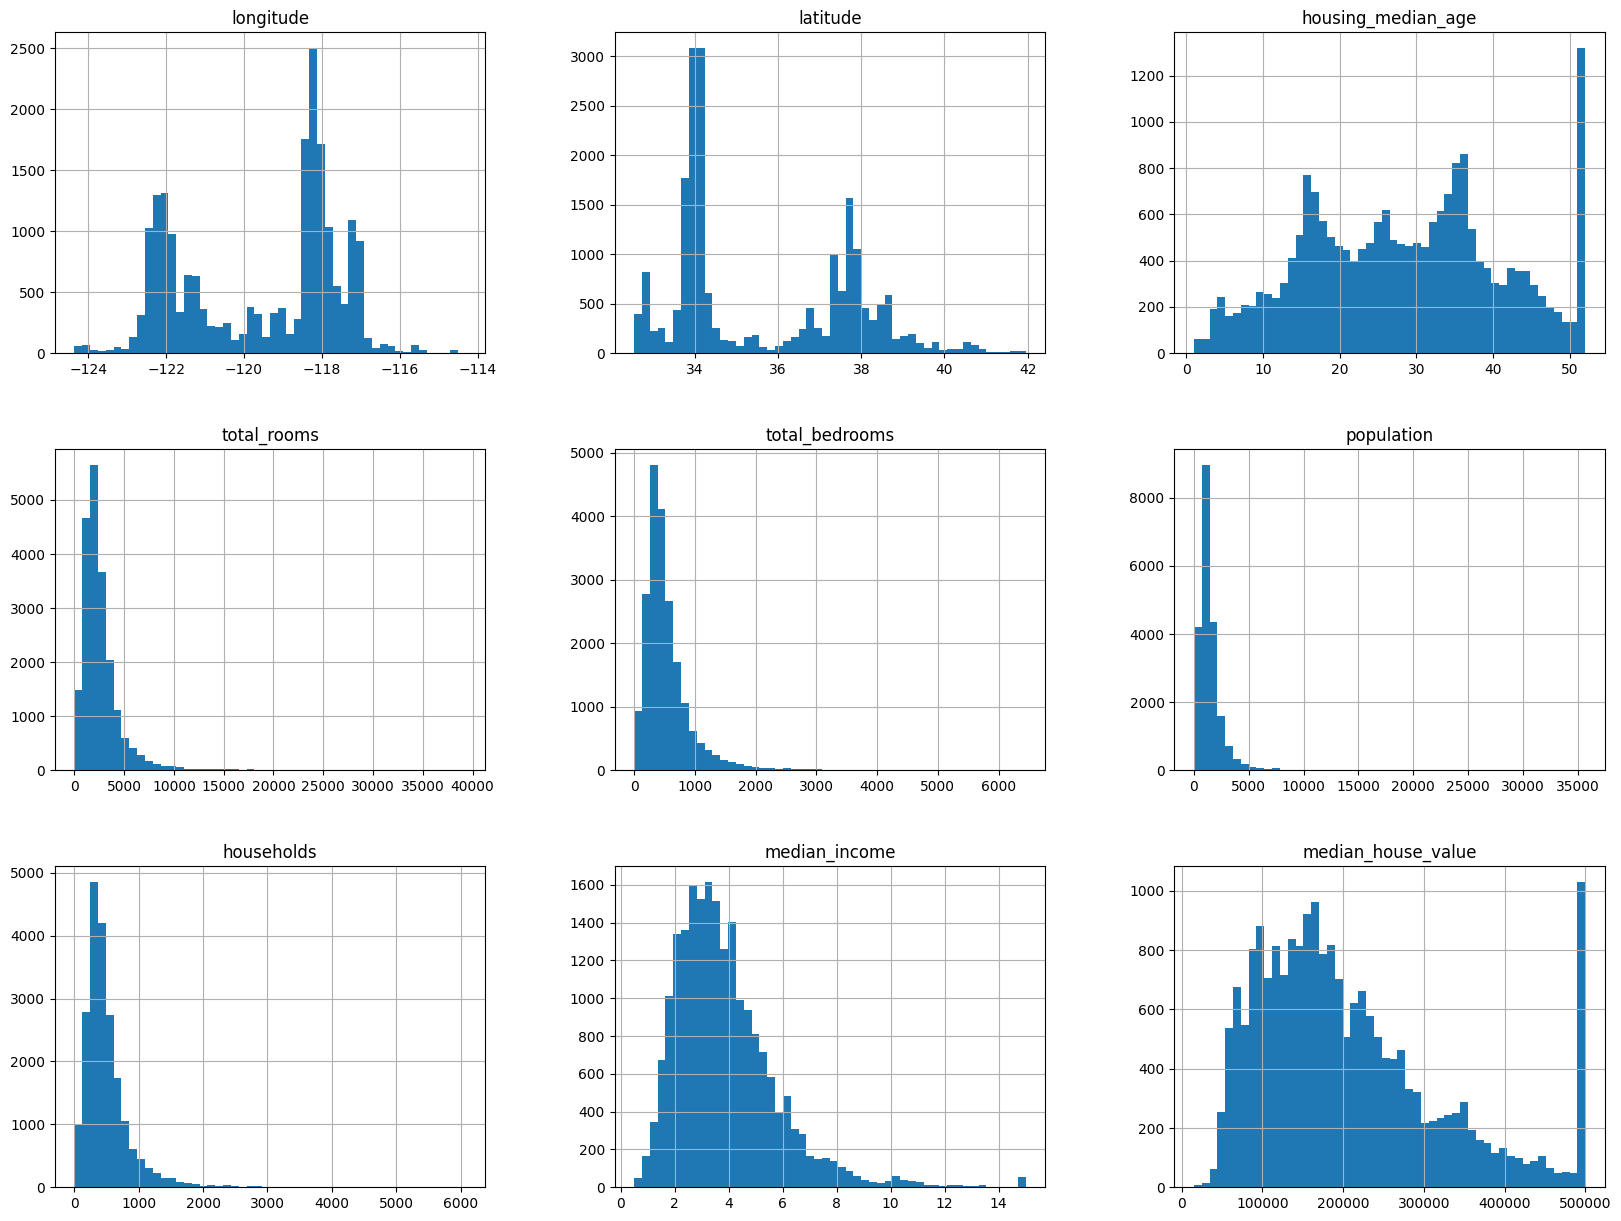

In [428]:
%matplotlib inline
housing.hist (bins = 50, figsize = (20, 15))
plt.show ()

## Now lets create a Test set


#### What is a Test set?





In [429]:
train_set, test_set = train_test_split (housing, test_size = 0.2, random_state = 42)


# print (len(train_set))
# print(len(test_set))

In [430]:
def test_set_check (identifier, test_ratio): 
   return crc32 (np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id (data, test_ratio, id_column): 
  ids = data[id_column] 
  in_test_set = ids.apply (lambda id_: test_set_check (id_, test_ratio)) 
  return data.loc[~in_test_set], data.loc[in_test_set]



housing_with_id = housing.reset_index () 
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id (housing_with_id, 0.2, "index")
train_set, test_set = train_test_split (housing_with_id, test_size = 0.2, random_state = 42)

In [431]:
housing["income_cat"] = pd.cut (housing["median_income"], 
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf], 
                               labels=[1, 2, 3, 4, 5])

In [432]:
split = StratifiedShuffleSplit (n_splits = 1, test_size = 0.2, random_state = 42)

for train_index, test_index in split.split (housing, housing["income_cat"]): 
   strat_train_set = housing.loc[train_index] 
   strat_test_set = housing.loc[test_index] 

#strat_test_set["income_cat"].value_counts() / len(strat_test_set)

In [433]:
#housing ["income_cat"].hist ()
#plt.show ()


In [434]:
for set_ in (strat_train_set, strat_test_set):
 set_.drop ("income_cat", axis = 1, inplace = True)      # use drop to remove income_cat to go back to the original state

## Data Visualization to understand and gain insights about data

#### No we get to data exploration part where we will only use train_set and neglet test_set since our data set is not too big

##

#### Lets make a copy of strat_train_set 

In [435]:
housing = strat_test_set.copy ()

### The following visualization represents the population with respect to geographical infomation (latitude and longitude),
### it is a good idea to create a scatterplot for better vizualization

<Axes: xlabel='longitude', ylabel='latitude'>

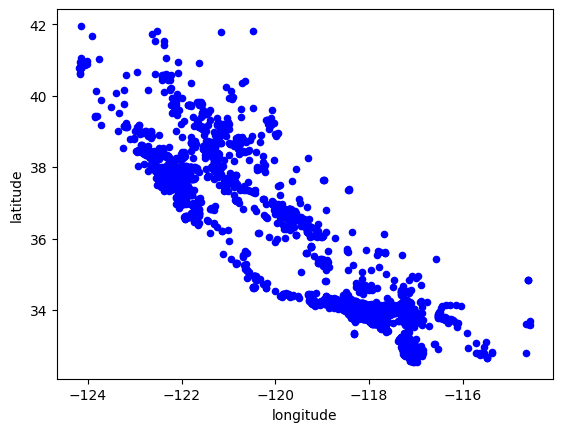

In [436]:
housing.plot (kind = "scatter", x = "longitude", y = "latitude", color = "blue")

#### It is still hard to see any pattern from the above plot, we can not clearly see where the population is more populated/clusttered. We need to set alpha option to about .1 to better vizualize places by high density of data points.

<Axes: xlabel='longitude', ylabel='latitude'>

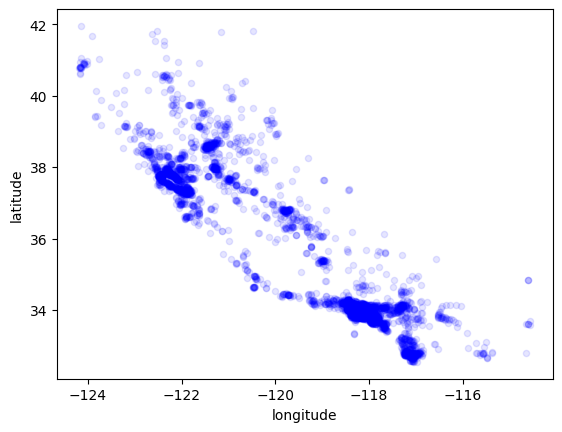

In [437]:
housing.plot (kind = "scatter", x = "longitude", y = "latitude", color = "blue", alpha = 0.1)